In [8]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

FILE = "/Volumes/Samsung_T5/data/ccs_projects/final_GIS_project.gpkg"
STATE_OUTLINE = "/Volumes/Samsung_T5/data/us_geo/us_states.json"

In [19]:
gdf = gpd.read_file(FILE)
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [20]:
states_gdf = gpd.read_file(STATE_OUTLINE)
states_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [27]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 15051 entries, 0 to 15050
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   SURFACE_ID        12404 non-null  float64 
 1   SYMNUM            12404 non-null  float64 
 2   API               15051 non-null  object  
 3   RELIAB            12404 non-null  object  
 4   LONG27            12404 non-null  float64 
 5   LAT27             12404 non-null  float64 
 6   LONG83            12404 non-null  float64 
 7   LAT83             12404 non-null  float64 
 8   WELLID            12404 non-null  object  
 9   X                 15051 non-null  int64   
 10  uicOPER           15051 non-null  object  
 11  uicClass          15051 non-null  int64   
 12  uicACTIVATEDFLAG  15051 non-null  object  
 13  uicBBLVOLINJ      15051 non-null  int64   
 14  uicH1NO           15051 non-null  object  
 15  uicW14NO          15051 non-null  object  
 16  uicSTATUS     

In [28]:
gdf.columns.values

array(['SURFACE_ID', 'SYMNUM', 'API', 'RELIAB', 'LONG27', 'LAT27',
       'LONG83', 'LAT83', 'WELLID', 'X', 'uicOPER', 'uicClass',
       'uicACTIVATEDFLAG', 'uicBBLVOLINJ', 'uicH1NO', 'uicW14NO',
       'uicSTATUS', 'permit_date', 'county_code', 'operator_name',
       'operator_number', 'geometry'], dtype=object)

In [29]:
for c in [
    "uicOPER",
    "uicClass",
    "uicACTIVATEDFLAG",
    "uicBBLVOLINJ",
    "uicH1NO",
    "uicW14NO",
    "uicSTATUS",
    "permit_date",
    "county_code",
    "operator_name",
    "operator_number",
]:
    print(f"---------- {c} ------------")
    print(gdf[c].value_counts())
    print("")

---------- uicOPER ------------
uicOPER
617544    5293
463316    1443
630555    1427
148113    1283
945936    1119
          ... 
100178       1
828880       1
344412       1
100589       1
567101       1
Name: count, Length: 95, dtype: int64

---------- uicClass ------------
uicClass
2    15051
Name: count, dtype: int64

---------- uicACTIVATEDFLAG ------------
uicACTIVATEDFLAG
Y    14009
N     1042
Name: count, dtype: int64

---------- uicBBLVOLINJ ------------
uicBBLVOLINJ
5000    2733
2000    2236
1000    1138
1500    1064
2500     788
        ... 
7685       1
7370       1
1645       1
3220       1
6285       1
Name: count, Length: 207, dtype: int64

---------- uicH1NO ------------
uicH1NO
01654    1060
01774    1057
01460     878
01905     795
01124     447
         ... 
15784       1
06964       1
09775       1
17166       1
22725       1
Name: count, Length: 300, dtype: int64

---------- uicW14NO ------------
uicW14NO
00000    15026
17090        1
16469        1
15848        1


(-106.7, -93.5)

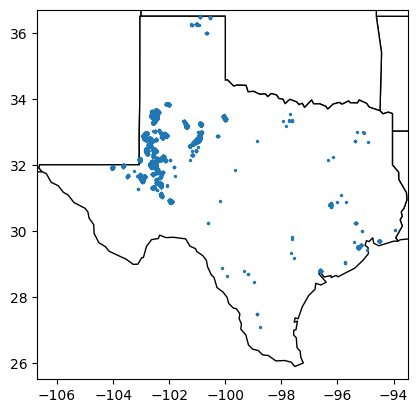

In [25]:
fig, ax = plt.subplots()

states_gdf.plot(ax=ax, color="white", edgecolor="black")
gdf.plot(ax=ax, markersize=2)
ax.set_ylim([25.5, 36.7])
ax.set_xlim([-106.7, -93.5])